In [2]:
import sys
sys.path.append('/home/youzhi/python-projects/sp-project/code')

In [3]:
spdir = "/home/youzhi/python-projects/sp-project"

In [4]:
import torch 
import os
import PmPNet as PN

# Device configuration
cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
batch_size = 50
num_epochs = 10
learning_rate = 1e-3

# Paths for different folders, data and result folders
datadir= f"{spdir}/combined_readindata"
wdir= f"{spdir}/Train_PN_result_sP"
if not os.path.exists(wdir):
    os.makedirs(wdir)

# Train PmPNet

We train (80%) and validate (20%) PmPNet on 5,000 waveform data with clear 
PmP waves and 100,000 waveform data without clear PmP waves.

In [5]:
# read in the training data 
train_loader, test_loader = PN.readin_data_train(datadir,"c_readindata",batch_size)

/home/youzhi/miniconda3/envs/pmpnet/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:235: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/youzhi/miniconda3/envs/pmpnet/lib/python3.9/site-packages/sklearn/preprocessing/_data.py:254: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


In [6]:
# train PmPNet
PN.NetTrain(wdir,"train_PN_log","net_PN_model",train_loader,learning_rate,num_epochs,batch_size,device)

Epoch [1/10], Step [1/34] Loss1: 3.349366,Loss2: 1.531668,Loss3: 0.576124
Epoch [2/10], Step [1/34] Loss1: 0.278965,Loss2: 1.335045,Loss3: 0.200921
Epoch [3/10], Step [1/34] Loss1: 0.136289,Loss2: 0.735965,Loss3: 0.187191
Epoch [4/10], Step [1/34] Loss1: 0.089869,Loss2: 0.811202,Loss3: 0.113194
Epoch [5/10], Step [1/34] Loss1: 0.107524,Loss2: 0.905991,Loss3: 0.181771
Epoch [6/10], Step [1/34] Loss1: 0.113380,Loss2: 0.941342,Loss3: 0.178809
Epoch [7/10], Step [1/34] Loss1: 0.081270,Loss2: 0.344484,Loss3: 0.107650
Epoch [8/10], Step [1/34] Loss1: 0.086986,Loss2: 0.773214,Loss3: 0.110172
Epoch [9/10], Step [1/34] Loss1: 0.040405,Loss2: 0.136174,Loss3: 0.122293
Epoch [10/10], Step [1/34] Loss1: 0.081947,Loss2: 0.183187,Loss3: 0.089876


In [7]:
# model evaluation on test data
PN.netevalu(wdir,"net_PN_model","prcurve_file","predict_PN_file",test_loader,device)

tensor([-10.3534,  -1.0562,  -1.6105,  -1.8872,  -7.1376,  -0.3916,  -9.3424,
          0.0605,  -1.9375,  -2.0904,  -2.9335,  31.1417,  -6.3629,  -1.2862,
         -6.3873,  -3.8736,  -2.1170,  -2.5245,  -9.5751,  -7.0983,  -1.6959,
         -2.7824,  -4.8900,  -2.9581,  -2.8048,  -6.5970,  -5.8867,  -8.5611,
         -0.2683,  -0.2055,  -5.8315,  -8.2430,  -1.8776,  -8.1585,  -0.4274,
         -7.0566,  -7.0474,  -7.4971,   0.3717,   0.4660,  -2.4175,   0.4031,
         -1.6791,   0.0696,  -3.8427,  -4.2337,  -1.2931,  -1.9208,  -2.6497,
         -8.0499], device='cuda:0')
tensor([ -3.2926,  -1.5540,  -0.2231,  -3.8794,  -6.4753,  -3.9939,  -8.5574,
          1.2012,  -6.7264,  -6.8610,  -7.6747,   0.4580,  -6.7692,  -2.3495,
          0.1483,  -5.3087,  -2.1238, -10.3568,   0.3954,  -4.2374,  -2.9166,
         -6.1414,  42.7666,  -2.3144,   4.5267,  -0.4808,  -0.9790,  -3.3434,
          0.3195,  -3.3046,   0.6724,  -7.6065,   3.6561,  -9.5910,  -3.3920,
          0.3332,  -3.3569, 

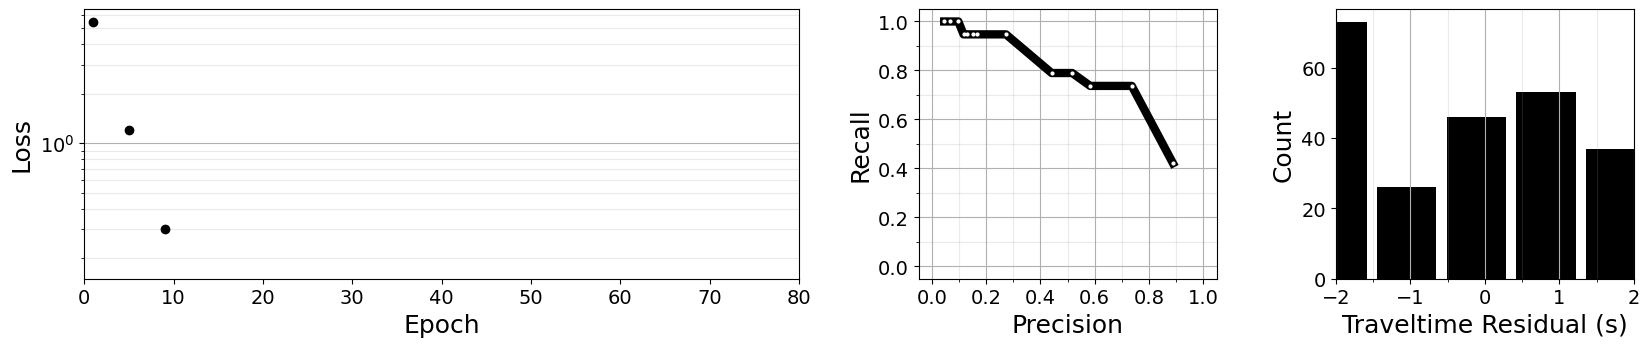

In [8]:
# quickly visualize the result
PN.plot_modeva(wdir,"train_PN_log","prcurve_file","predict_PN_file","plot_PN_modevalu")

In [12]:
import matplotlib.pyplot as plt

In [24]:
model = PN.ResnetEncoder(PN.BasicBlock, PN.DecodeBlock, [2, 2], 2)

model.load_state_dict(torch.load(f"{wdir}/net_PN_model"))
model.cuda()


ResnetEncoder(
  (conv1): Conv1d(1, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
  (relu): ReLU(inplace=True)
  (maxpool1): MaxPool1d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (avgpool): AvgPool1d(kernel_size=(3,), stride=(3,), padding=(0,))
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (conv2): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn2): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv1d(128, 128, kernel_size=(3,), stride=(1,), padding=(1,), bias=False)
      (bn3): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (

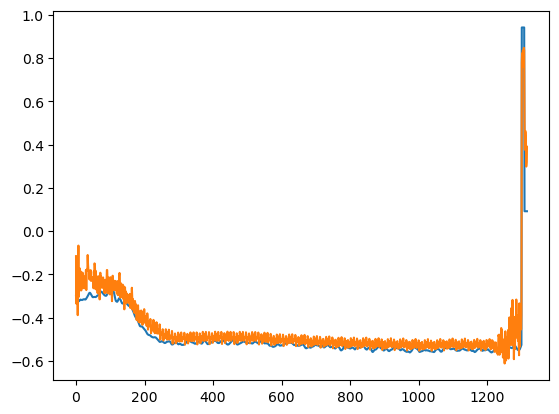

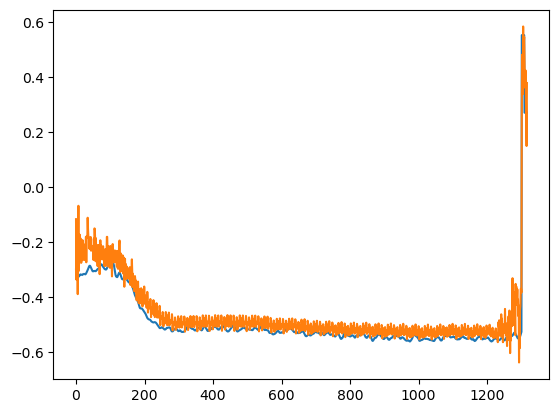

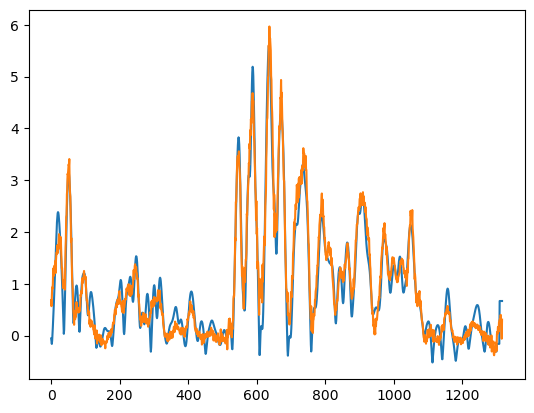

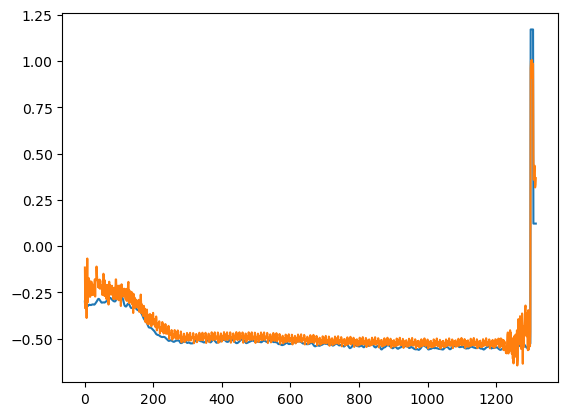

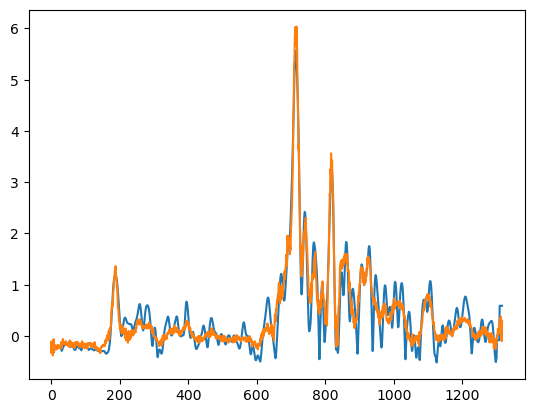

In [36]:
#i=49
for signals, labels in test_loader:
    #print(signals[0][0])
    #plt.plot(signals[i][0])
    signals_c = signals.clone()
    signals = signals.to(device)
    labels = labels.to(device)
    
    latents = model.encode(signals)
    prediction = model(signals)
    outputs = model.decode(latents)
    outputs_c = outputs.cpu().detach().numpy()
    #plt.plot(outputs_c[i][0])
    for i in range(5):
        plt.plot(signals_c[i][0])
        plt.plot(outputs_c[i][0])
        plt.show()
    break

# Apply pre-trained PmPNet to identify PmP phase on real data

### Applied to a certain year

In [10]:
# read in the real data 
test_loader = PN.readin_data_real(datadir,"ValidationData_2015",batch_size)

In [11]:
PN.netpredict(datadir,"ValidationData_2015",wdir,"net_PN_model","predict_PN_file_2015",test_loader,device)

NO.: 0   ID: 37272439   PmP_Prob: 0.323879  PmP_Time: 20.893116  dist: 127.9   evdp: 11.59   mag: 2.1  evtnm: 20151113_1204.CI.DTP
NO.: 1   ID: 37198399   PmP_Prob: 0.000000  PmP_Time: 17.361309  dist: 103.3   evdp: 18.04   mag: 2.3  evtnm: 20150705_1315.CI.SYN
NO.: 2   ID: 37150703   PmP_Prob: 0.000001  PmP_Time: 14.302899  dist: 76.6   evdp: 6.28   mag: 2.4  evtnm: 20150423_1454.CI.TOR
NO.: 3   ID: 37501608   PmP_Prob: 0.000037  PmP_Time: 13.073999  dist: 60.6   evdp: 2.31   mag: 2.2  evtnm: 20151214_0708.CI.DPP
NO.: 4   ID: 37508080   PmP_Prob: 0.000002  PmP_Time: 19.669258  dist: 111.8   evdp: 2.76   mag: 2.3  evtnm: 20151230_1027.CI.JVA
NO.: 5   ID: 37148391   PmP_Prob: 0.000000  PmP_Time: 16.840071  dist: 91.2   evdp: -0.18   mag: 2.3  evtnm: 20150420_0231.CI.HEC
NO.: 6   ID: 37305208   PmP_Prob: 0.000026  PmP_Time: 24.993418  dist: 151.4   evdp: 6.62   mag: 2.5  evtnm: 20150114_1203.CI.SYP
NO.: 7   ID: 37301936   PmP_Prob: 0.000000  PmP_Time: 26.983143  dist: 170.9   evdp: 8.30 

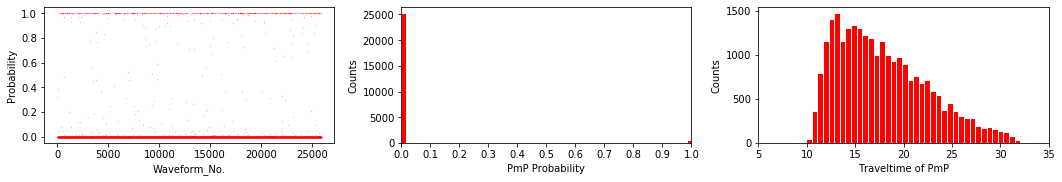

In [2]:
PN.plot_modpredict(wdir,"predict_PN_file_2015","plot_PN_predict2015")